# Assignment1 
### Christopher Hong

## Task 2

In [1]:
import keras
import numpy as np
np.random.seed(0)
import random
random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Preparing the data

#### Exploratory Data Analysis

In [3]:
# Load the spambase data set
spambase_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
col_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',\
             'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',\
             'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',\
             'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',\
             'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',\
             'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',\
             'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',\
             'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',\
             'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',\
             'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;:', 'char_freq_(:',\
             'char_freq_[:', 'char_freq_!:', 'char_freq_$:', 'char_freq_#:', 'capital_run_length_average',\
             'capital_run_length_longest', 'capital_run_length_total', 'class']
spambase = pd.read_csv(spambase_url, header=None, names=col_names)

In [4]:
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
spambase.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [13]:
spambase.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [18]:
# Check data types
spambase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [27]:
# check missing values
print('?' in spambase)
print('N/A' in spambase)
print(np.nan in spambase)
print('NaN' in spambase)
print(pd.isna(spambase).sum())
print(pd.isnull(spambase).sum())

False
False
False
False
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet

In [36]:
del spambase

#### Loading spam email dataset

In [74]:
def load_spam_data():
    """
    Load the spam email data from the UCI repository.
    Return a training and testing subsets.
    """
    
    spambase_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
    
    # Load the data into DataFrame
    spambase = pd.read_csv(spambase_url, header=None)
    
    # Split the data into features and class
    X = spambase.iloc[:,:-1].astype('float32')
    y = spambase.iloc[:,-1].astype('float32')
    
    # Normalize the data
    X.iloc[:,:] = StandardScaler().fit_transform(X)
    
    # Transform the data into ndarray, split it into 80/20 with stratify
    np.random.seed(0)
    x_train, x_test, y_train, y_test = train_test_split(X.values, 
                                                        y.values, 
                                                        test_size=0.2, 
                                                        stratify=y.values, 
                                                        random_state=0)
    
    return x_train, x_test, y_train, y_test

In [75]:
x_train, x_test, y_train, y_test = load_spam_data()

In [76]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train_samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3680, 57)
3680 train_samples
921 test samples


#### Setting aside a validation set

In [77]:
partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, 
                                                                  y_train, 
                                                                  test_size=0.25, 
                                                                  stratify=y_train, 
                                                                  random_state=0)

In [78]:
print(partial_x_train.shape[0], 'train_samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

2760 train_samples
920 validation samples
921 test samples


### Creating a model using the Sequential API

#### Defining a model

In [79]:
spam_model = keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(57,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

#### Compiling the model

In [80]:
spam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Training the model

In [81]:
np.random.seed(0)
spam_history = spam_model.fit(partial_x_train,
                              partial_y_train,
                              epochs=100,
                              batch_size=512,
                              validation_data=(x_val, y_val))

Train on 2760 samples, validate on 920 samples
Epoch 1/100
2760/2760 [==============================] - 0s 66us/step - loss: 0.6459 - accuracy: 0.6736 - val_loss: 0.5706 - val_accuracy: 0.7717
Epoch 2/100
2760/2760 [==============================] - 0s 15us/step - loss: 0.5422 - accuracy: 0.7895 - val_loss: 0.4921 - val_accuracy: 0.8304
Epoch 3/100
2760/2760 [==============================] - 0s 13us/step - loss: 0.4612 - accuracy: 0.8446 - val_loss: 0.4282 - val_accuracy: 0.8598
Epoch 4/100
2760/2760 [==============================] - 0s 13us/step - loss: 0.3941 - accuracy: 0.8732 - val_loss: 0.3771 - val_accuracy: 0.8848
Epoch 5/100
2760/2760 [==============================] - 0s 15us/step - loss: 0.3405 - accuracy: 0.8888 - val_loss: 0.3384 - val_accuracy: 0.8902
Epoch 6/100
2760/2760 [==============================] - 0s 13us/step - loss: 0.3007 - accuracy: 0.8971 - val_loss: 0.3118 - val_accuracy: 0.8989
Epoch 7/100
2760/2760 [==============================] - 0s 13us/step - loss:

#### Plotting the training and validation loss and accuracy

In [82]:
def plot_model_performance(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss)+1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show();
    
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()

    plt.show();

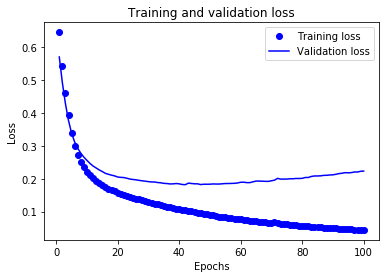

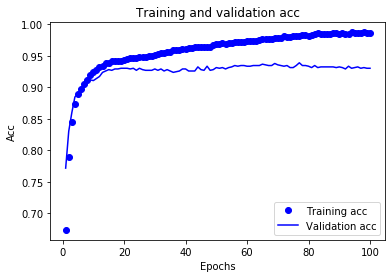

In [83]:
plot_model_performance(spam_history)

In [84]:
spam_model.evaluate(x_test, y_test)

921/921 [==============================] - 0s 51us/step


[0.2559755987343131, 0.9391965270042419]

#### Find out the best # of epochs using EarlyStopping

In [87]:
np.random.seed(0)
spam_model = keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(57,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

spam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

spam_history = spam_model.fit(partial_x_train,
                              partial_y_train,
                              epochs=100,
                              batch_size=512,
                              validation_data=(x_val, y_val),
                              callbacks=[EarlyStopping(patience=10)])

spam_model.evaluate(x_test, y_test)

Train on 2760 samples, validate on 920 samples
Epoch 1/100
2760/2760 [==============================] - 0s 67us/step - loss: 0.6329 - accuracy: 0.6623 - val_loss: 0.5640 - val_accuracy: 0.7913
Epoch 2/100
2760/2760 [==============================] - 0s 18us/step - loss: 0.5154 - accuracy: 0.8127 - val_loss: 0.4724 - val_accuracy: 0.8391
Epoch 3/100
2760/2760 [==============================] - 0s 20us/step - loss: 0.4293 - accuracy: 0.8551 - val_loss: 0.4045 - val_accuracy: 0.8739
Epoch 4/100
2760/2760 [==============================] - 0s 14us/step - loss: 0.3648 - accuracy: 0.8815 - val_loss: 0.3561 - val_accuracy: 0.8946
Epoch 5/100
2760/2760 [==============================] - 0s 20us/step - loss: 0.3191 - accuracy: 0.8989 - val_loss: 0.3214 - val_accuracy: 0.9043
Epoch 6/100
2760/2760 [==============================] - 0s 16us/step - loss: 0.2867 - accuracy: 0.9069 - val_loss: 0.2970 - val_accuracy: 0.9087
Epoch 7/100
2760/2760 [==============================] - 0s 21us/step - loss:

[0.16970302128960074, 0.9446253776550293]

#### Retraining a model from scratch

In [88]:
np.random.seed(0)
spam_model = keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(57,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

spam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

spam_history = spam_model.fit(x_train,
                              y_train,
                              epochs=42,
                              batch_size=512)

spam_model.evaluate(x_test, y_test)

Epoch 1/42
3680/3680 [==============================] - 0s 43us/step - loss: 0.6750 - accuracy: 0.5750
Epoch 2/42
3680/3680 [==============================] - 0s 14us/step - loss: 0.5396 - accuracy: 0.7948
Epoch 3/42
3680/3680 [==============================] - 0s 12us/step - loss: 0.4473 - accuracy: 0.8516
Epoch 4/42
3680/3680 [==============================] - 0s 13us/step - loss: 0.3758 - accuracy: 0.8747
Epoch 5/42
3680/3680 [==============================] - 0s 14us/step - loss: 0.3213 - accuracy: 0.8910
Epoch 6/42
3680/3680 [==============================] - 0s 11us/step - loss: 0.2816 - accuracy: 0.9024
Epoch 7/42
3680/3680 [==============================] - 0s 13us/step - loss: 0.2543 - accuracy: 0.9149
Epoch 8/42
3680/3680 [==============================] - 0s 13us/step - loss: 0.2346 - accuracy: 0.9177
Epoch 9/42
3680/3680 [==============================] - 0s 15us/step - loss: 0.2198 - accuracy: 0.9228
Epoch 10/42
3680/3680 [==============================] - 0s 12us/step - l

[0.16537360245125302, 0.9478827118873596]

### Fine tuning the model

#### Randomized serach CV for best params

In [89]:
# Create a classification model with given hyperperameters
def build_model(learning_rate=1e-3, n_hidden=2, n_neurons=64, input_shape=57):   
    model = Sequential()
    for i in range(n_hidden):
        if i == 0:
            model.add(Dense(n_neurons, activation='relu', input_shape=(input_shape,)))
        else:
            model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a Keras classifier
keras_clf = KerasClassifier(build_fn=build_model)

In [92]:
np.random.seed(0)
params = {
    'learning_rate': [0.0001, 0.001, 0.1],
    'n_hidden': [2, 3, 4],
    'n_neurons': [64, 128, 256, 512],
    'batch_size': [64, 128, 256, 512]}

random_search_cv = RandomizedSearchCV(keras_clf, params, n_iter=10, cv=3, random_state=0)
random_search_cv.fit(partial_x_train,
                     partial_y_train,
                     epochs=100,
                     validation_data=(x_val, y_val),
                     callbacks=[EarlyStopping(patience=10)],
                     verbose=0)

920/920 [==============================] - 0s 19us/step


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fdd484b4690>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'batch_size': [64, 128, 256, 512],
                                        'learning_rate': [0.0001, 0.001, 0.1],
                                        'n_hidden': [2, 3, 4],
                                        'n_neurons': [64, 128, 256, 512]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

#### Best params

In [93]:
random_search_cv.best_params_

{'n_neurons': 128, 'n_hidden': 3, 'learning_rate': 0.001, 'batch_size': 256}

#### Rebuilt the best model and retrain it

Train on 2760 samples, validate on 920 samples
Epoch 1/100
2760/2760 [==============================] - 0s 83us/step - loss: 0.5627 - accuracy: 0.7457 - val_loss: 0.4196 - val_accuracy: 0.8522
Epoch 2/100
2760/2760 [==============================] - 0s 30us/step - loss: 0.3310 - accuracy: 0.8757 - val_loss: 0.3047 - val_accuracy: 0.9022
Epoch 3/100
2760/2760 [==============================] - 0s 31us/step - loss: 0.2478 - accuracy: 0.9174 - val_loss: 0.2531 - val_accuracy: 0.9174
Epoch 4/100
2760/2760 [==============================] - 0s 22us/step - loss: 0.2097 - accuracy: 0.9275 - val_loss: 0.2262 - val_accuracy: 0.9228
Epoch 5/100
2760/2760 [==============================] - 0s 22us/step - loss: 0.1819 - accuracy: 0.9399 - val_loss: 0.2114 - val_accuracy: 0.9261
Epoch 6/100
2760/2760 [==============================] - 0s 34us/step - loss: 0.1661 - accuracy: 0.9446 - val_loss: 0.2035 - val_accuracy: 0.9304
Epoch 7/100
2760/2760 [==============================] - 0s 27us/step - loss:

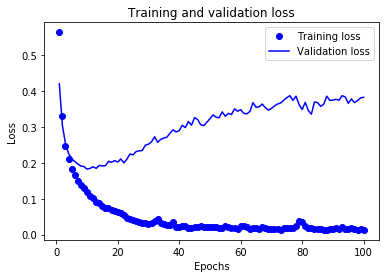

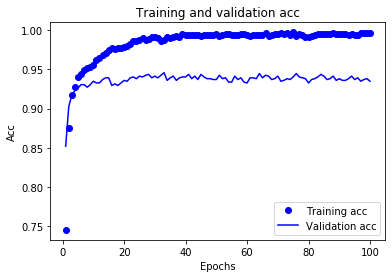

921/921 [==============================] - 0s 87us/step


[0.4575970869847087, 0.9467969536781311]

In [137]:
np.random.seed(0)
best_spam_model = build_model(1e-3, 3, 128)
best_spam_model_history = best_spam_model.fit(partial_x_train,
                                              partial_y_train,
                                              epochs=100,
                                              batch_size=256,
                                              validation_data=(x_val, y_val))
plot_model_performance(best_spam_model_history)
best_spam_model.evaluate(x_test, y_test)

#### Early stopping

In [149]:
np.random.seed(0)
es_best_spam_model = build_model(1e-3, 3, 128)
es_best_spam_model.fit(partial_x_train,
                        partial_y_train,
                        epochs=100,
                        batch_size=256,
                        validation_data=(x_val, y_val),
                        callbacks=[EarlyStopping(patience=10)])
es_best_spam_model.evaluate(x_test, y_test)

Train on 2760 samples, validate on 920 samples
Epoch 1/100
2760/2760 [==============================] - 0s 85us/step - loss: 0.5754 - accuracy: 0.7402 - val_loss: 0.4324 - val_accuracy: 0.8761
Epoch 2/100
2760/2760 [==============================] - 0s 30us/step - loss: 0.3342 - accuracy: 0.8902 - val_loss: 0.3085 - val_accuracy: 0.8989
Epoch 3/100
2760/2760 [==============================] - 0s 30us/step - loss: 0.2485 - accuracy: 0.9141 - val_loss: 0.2629 - val_accuracy: 0.9141
Epoch 4/100
2760/2760 [==============================] - 0s 24us/step - loss: 0.2106 - accuracy: 0.9315 - val_loss: 0.2320 - val_accuracy: 0.9250
Epoch 5/100
2760/2760 [==============================] - 0s 29us/step - loss: 0.1838 - accuracy: 0.9384 - val_loss: 0.2172 - val_accuracy: 0.9315
Epoch 6/100
2760/2760 [==============================] - 0s 30us/step - loss: 0.1686 - accuracy: 0.9420 - val_loss: 0.2121 - val_accuracy: 0.9304
Epoch 7/100
2760/2760 [==============================] - 0s 23us/step - loss:

[0.20953155986875716, 0.9446253776550293]

In [164]:
np.random.seed(0)
es_best_spam_model = build_model(1e-3, 3, 128)
es_best_spam_model.fit(x_train,
                       y_train,
                       epochs=11,
                       batch_size=256)
es_best_spam_model.evaluate(x_test, y_test)

Epoch 1/11
3680/3680 [==============================] - 0s 59us/step - loss: 0.5470 - accuracy: 0.7533
Epoch 2/11
3680/3680 [==============================] - 0s 23us/step - loss: 0.2992 - accuracy: 0.8954
Epoch 3/11
3680/3680 [==============================] - 0s 23us/step - loss: 0.2202 - accuracy: 0.9253
Epoch 4/11
3680/3680 [==============================] - 0s 20us/step - loss: 0.1871 - accuracy: 0.9345
Epoch 5/11
3680/3680 [==============================] - 0s 23us/step - loss: 0.1665 - accuracy: 0.9429
Epoch 6/11
3680/3680 [==============================] - 0s 23us/step - loss: 0.1573 - accuracy: 0.9427
Epoch 7/11
3680/3680 [==============================] - 0s 22us/step - loss: 0.1436 - accuracy: 0.9470
Epoch 8/11
3680/3680 [==============================] - 0s 22us/step - loss: 0.1315 - accuracy: 0.9530
Epoch 9/11
3680/3680 [==============================] - 0s 24us/step - loss: 0.1239 - accuracy: 0.9522
Epoch 10/11
3680/3680 [==============================] - 0s 25us/step - l

[0.1684231774297004, 0.9522258639335632]

#### l2 regularization

In [165]:
np.random.seed(0)
l2_best_spam_model = keras.models.Sequential([
    Dense(128, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu', input_shape=(57,)),
    Dense(128, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'),
    Dense(128, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'),
    Dense(1, activation='sigmoid')
])

l2_best_spam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

l2_best_spam_model.fit(partial_x_train,
                        partial_y_train,
                        epochs=100,
                        batch_size=256,
                        validation_data=(x_val, y_val),
                        callbacks=[EarlyStopping(patience=10)])

l2_best_spam_model.evaluate(x_test, y_test)

Train on 2760 samples, validate on 920 samples
Epoch 1/100
2760/2760 [==============================] - 0s 93us/step - loss: 3.7007 - accuracy: 0.7344 - val_loss: 3.3224 - val_accuracy: 0.8761
Epoch 2/100
2760/2760 [==============================] - 0s 25us/step - loss: 3.0453 - accuracy: 0.8851 - val_loss: 2.7558 - val_accuracy: 0.8978
Epoch 3/100
2760/2760 [==============================] - 0s 32us/step - loss: 2.5280 - accuracy: 0.9091 - val_loss: 2.3100 - val_accuracy: 0.9087
Epoch 4/100
2760/2760 [==============================] - 0s 34us/step - loss: 2.1128 - accuracy: 0.9192 - val_loss: 1.9389 - val_accuracy: 0.9196
Epoch 5/100
2760/2760 [==============================] - 0s 25us/step - loss: 1.7670 - accuracy: 0.9308 - val_loss: 1.6323 - val_accuracy: 0.9239
Epoch 6/100
2760/2760 [==============================] - 0s 33us/step - loss: 1.4824 - accuracy: 0.9351 - val_loss: 1.3779 - val_accuracy: 0.9272
Epoch 7/100
2760/2760 [==============================] - 0s 24us/step - loss:

[0.23819103060405494, 0.9457111954689026]

In [170]:
np.random.seed(0)
l2_best_spam_model = keras.models.Sequential([
    Dense(128, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu', input_shape=(57,)),
    Dense(128, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'),
    Dense(128, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'),
    Dense(1, activation='sigmoid')
])

l2_best_spam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

l2_best_spam_model.fit(x_train,
                       y_train,
                       epochs=58,
                       batch_size=256)

l2_best_spam_model.evaluate(x_test, y_test)

Epoch 1/58
3680/3680 [==============================] - 0s 63us/step - loss: 3.6211 - accuracy: 0.7432
Epoch 2/58
3680/3680 [==============================] - 0s 24us/step - loss: 2.7896 - accuracy: 0.8842
Epoch 3/58
3680/3680 [==============================] - 0s 20us/step - loss: 2.1722 - accuracy: 0.9087
Epoch 4/58
3680/3680 [==============================] - 0s 24us/step - loss: 1.7020 - accuracy: 0.9236
Epoch 5/58
3680/3680 [==============================] - 0s 26us/step - loss: 1.3416 - accuracy: 0.9283
Epoch 6/58
3680/3680 [==============================] - 0s 24us/step - loss: 1.0688 - accuracy: 0.9340
Epoch 7/58
3680/3680 [==============================] - 0s 26us/step - loss: 0.8615 - accuracy: 0.9359
Epoch 8/58
3680/3680 [==============================] - 0s 24us/step - loss: 0.7045 - accuracy: 0.9383
Epoch 9/58
3680/3680 [==============================] - 0s 24us/step - loss: 0.5882 - accuracy: 0.9418
Epoch 10/58
3680/3680 [==============================] - 0s 25us/step - l

[0.22419342702814862, 0.9554831981658936]

#### Dropout

In [176]:
np.random.seed(0)
do_spam_model = keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(57,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

do_spam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

do_spam_model.fit(partial_x_train,
                partial_y_train,
                epochs=100,
                batch_size=256,
                validation_data=(x_val, y_val),
                callbacks=[EarlyStopping(patience=10)])

do_spam_model.evaluate(x_test, y_test)

Train on 2760 samples, validate on 920 samples
Epoch 1/100
2760/2760 [==============================] - 0s 136us/step - loss: 0.5753 - accuracy: 0.7475 - val_loss: 0.4302 - val_accuracy: 0.8652
Epoch 2/100
2760/2760 [==============================] - 0s 38us/step - loss: 0.3573 - accuracy: 0.8685 - val_loss: 0.3037 - val_accuracy: 0.8924
Epoch 3/100
2760/2760 [==============================] - 0s 29us/step - loss: 0.2743 - accuracy: 0.9022 - val_loss: 0.2552 - val_accuracy: 0.9185
Epoch 4/100
2760/2760 [==============================] - 0s 38us/step - loss: 0.2402 - accuracy: 0.9094 - val_loss: 0.2374 - val_accuracy: 0.9228
Epoch 5/100
2760/2760 [==============================] - 0s 27us/step - loss: 0.2090 - accuracy: 0.9210 - val_loss: 0.2232 - val_accuracy: 0.9293
Epoch 6/100
2760/2760 [==============================] - 0s 37us/step - loss: 0.2055 - accuracy: 0.9236 - val_loss: 0.2127 - val_accuracy: 0.9315
Epoch 7/100
2760/2760 [==============================] - 0s 30us/step - loss

[0.1867113827801553, 0.9467969536781311]

In [199]:
np.random.seed(0)
do_spam_model = keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(57,)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

do_spam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

do_spam_model.fit(x_train,
                y_train,
                epochs=20,
                batch_size=256)

do_spam_model.evaluate(x_test, y_test)

Epoch 1/20
3680/3680 [==============================] - 0s 92us/step - loss: 0.5707 - accuracy: 0.7201
Epoch 2/20
3680/3680 [==============================] - 0s 25us/step - loss: 0.3334 - accuracy: 0.8766
Epoch 3/20
3680/3680 [==============================] - 0s 23us/step - loss: 0.2581 - accuracy: 0.9060
Epoch 4/20
3680/3680 [==============================] - 0s 22us/step - loss: 0.2316 - accuracy: 0.9144
Epoch 5/20
3680/3680 [==============================] - 0s 23us/step - loss: 0.2074 - accuracy: 0.9266
Epoch 6/20
3680/3680 [==============================] - 0s 28us/step - loss: 0.2028 - accuracy: 0.9280
Epoch 7/20
3680/3680 [==============================] - 0s 24us/step - loss: 0.1899 - accuracy: 0.9285
Epoch 8/20
3680/3680 [==============================] - 0s 22us/step - loss: 0.1751 - accuracy: 0.9329
Epoch 9/20
3680/3680 [==============================] - 0s 24us/step - loss: 0.1670 - accuracy: 0.9389
Epoch 10/20
3680/3680 [==============================] - 0s 23us/step - l

[0.15823437265412685, 0.9576547145843506]

#### Save model and weights

In [200]:
do_spam_model.save('keras_spam_trained_model.h5')

#### Score trained model

In [201]:
model = keras.models.load_model('keras_spam_trained_model.h5')
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss', scores[0])
print('Test accuracy', scores[1])

921/921 [==============================] - 0s 101us/step
Test loss 0.15823437265412685
Test accuracy 0.9576547145843506
